#  Feature Scaling & Feature Engineering

![](https://static01.nyt.com/images/2020/11/29/fashion/24DIAMONDREPLICA2/24DIAMONDREPLICA2-superJumbo.jpg)

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, many classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

Another reason why feature scaling is applied is that gradient descent converges much faster with feature scaling than without it.

The idea with gradient descent is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent. Conversely, stepping in the direction of the gradient will lead to a local maximum of that function; the procedure is then known as gradient ascent.

![](https://kevinbinz.files.wordpress.com/2019/05/gradient_descent_line_graph.gif)

- [Feature Scaling Reference](https://en.wikipedia.org/wiki/Feature_scaling#:~:text=a%20distance%20measure.-,Application,scaling%20changes%20the%20SVM%20result.)
- [Gradient Descent Reference](https://en.wikipedia.org/wiki/Gradient_descent)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Cost Functions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Plot style
plt.style.use("seaborn-whitegrid")

In [2]:
# Load Data
df = sns.load_dataset("diamonds")

# original dataset (100 records 80%20%) --> init_train (80 records) and test (20 records)
# init_train (80 records 80%20%) --> train_actual (64 records) and vali (16 records)

# EDA will happen on init_train --> train the model on train_actual --> test in vali
# keep looping until you are happy about the model performance 

# test the model on the bild dataset "test"


# Split Data
train, test = train_test_split(
    df, 
    train_size = .80,
    test_size =.20,
    random_state=42
)

train, val = train_test_split(
    train,
    train_size = .80,
    test_size = .20,
    random_state=42
)

In [3]:
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
6881,1.16,Good,F,SI2,60.8,65.0,4131,6.78,6.75,4.11
15412,1.51,Premium,I,SI2,61.3,55.0,6173,7.41,7.36,4.53
3782,1.01,Good,G,SI2,64.0,59.0,3461,6.34,6.31,4.05
34635,0.31,Ideal,E,VS2,61.9,55.0,872,4.39,4.36,2.71
37155,0.32,Ideal,D,VS2,61.0,57.0,972,4.46,4.42,2.71


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34521 entries, 6881 to 49854
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    34521 non-null  float64 
 1   cut      34521 non-null  category
 2   color    34521 non-null  category
 3   clarity  34521 non-null  category
 4   depth    34521 non-null  float64 
 5   table    34521 non-null  float64 
 6   price    34521 non-null  int64   
 7   x        34521 non-null  float64 
 8   y        34521 non-null  float64 
 9   z        34521 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 2.2 MB


In [5]:
# Model with only numeric features
train.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [6]:
(df.dtypes != "category").values & (df.dtypes != "object").values 

array([ True, False, False, False,  True,  True,  True,  True,  True,
        True])

In [7]:
def cleaner(df):
    
    "Return Only Numeric Features"
    
    # Create boolean array with only columns that are float64
    columns_bool = (df.dtypes != "category").values & (df.dtypes != "object").values 

    # Return only numeric columns
    df = df.iloc[:, columns_bool].dropna()

    return df

train_numeric = cleaner(train)
test_numeric = cleaner(test)

In [8]:
# Create X, y train and validation sets

target = "price"

# feature set --> everything except for price --> X_train
# target set/column --> price --> y_train

X_train = train_numeric.drop(target, axis=1)
y_train = train_numeric[target]

X_test = test_numeric.drop(target, axis=1)
y_test = test_numeric[target]

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8589396072085457

In [10]:
lr.coef_

array([10648.67477587,  -200.44764091,  -105.60923409, -1273.05445187,
          38.36164601,    54.22385327])

In [11]:
lr.intercept_

20770.152708563564

In [12]:
pd.concat([X_train, y_train], axis = 1)

,carat,depth,table,x,y,z,price
6881,1.16,60.8,65.0,6.78,6.75,4.11,4131
15412,1.51,61.3,55.0,7.41,7.36,4.53,6173
3782,1.01,64.0,59.0,6.34,6.31,4.05,3461
34635,0.31,61.9,55.0,4.39,4.36,2.71,872
37155,0.32,61.0,57.0,4.46,4.42,2.71,972
...,...,...,...,...,...,...,...
15653,1.54,61.5,61.0,7.41,7.31,4.53,6278
30039,0.32,61.3,56.0,4.40,4.44,2.71,719
47963,0.52,61.2,58.0,5.20,5.16,3.17,1919
48105,0.50,60.7,57.0,5.14,5.10,3.11,1935


 # Using Model for one record prediction
 
 ## y = (a x1) + (b x2) + (c x3) + (d x4) + (e x5) + (f x6) + (g x7) + intercept
 
 ### where [a,b,c,d,e,f,g] are the coeffecients from lr.coef_

In [13]:
# predicting resutls from the model

np.round(lr.predict([[1.16, 60.8, 65, 6.78,6.75,4.11]]))

array([5921.])

In [14]:
def calc_cost(y_true, y_predict):
    
    "Calculate Cost Functions and print output"
    
    result_dict = {}
    
    mse = mean_squared_error(y_true, y_predict)
    mae = mean_absolute_error(y_true, y_predict)
    rmse = mean_squared_error(y_true, y_predict, squared=False)
    
    ls = [mse, mae, rmse]
    ls2 = ["MSE", "MAE", "RMSE"]
    
    for x in range(len(ls)):
        print(f"{ls2[x]}: {ls[x]}")
        result_dict[ls2[x]] = ls[x]
    
    return result_dict

# Save results to object and print results
print("Baseline")
b_preds = [y_train.mean() for x in range(len(y_train))]
res0 = calc_cost(y_train, b_preds)

print("\nLinear Regression")
res1 = calc_cost(y_train, lr.predict(X_train))

Baseline
MSE: 15959446.675367089
MAE: 3040.771604515672
RMSE: 3994.927618288858

Linear Regression
MSE: 2273010.749657636
MAE: 897.1133312353487
RMSE: 1507.6507386187413


In [15]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Feature Scaling

![](https://miro.medium.com/max/2625/1*yR54MSI1jjnf2QeGtt57PA.png)

The `sklearn.preprocessing` package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.

In general, learning algorithms benefit from standardization of the data set. If some outliers are present in the set, robust scalers or transformers are more appropriate. The behaviors of the different scalers, transformers, and normalizers on a dataset containing marginal outliers is highlighted in [Compare the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py).

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

Here is a list of ML algorithms that require feature scaling and some that dont.
![](https://miro.medium.com/max/1184/1*5N0SXyZVXUV-MZuxb1mZ2g.png)

#### Standard Scaler

![](https://cdn-images-1.medium.com/max/800/0*vQEjz0mvylP--30Q.GIF)

StandardScaler removes the mean and scales the data to unit variance. The scaling shrinks the range of the feature values as shown in the left figure below. However, the outliers have an influence when computing the empirical mean and standard deviation. Note in particular that because the outliers on each feature have different magnitudes, the spread of the transformed data on each feature is very different: most of the data lie in the [-2, 4] range for the transformed median income feature while the same data is squeezed in the smaller [-0.2, 0.2] range for the transformed number of households.

StandardScaler therefore cannot guarantee balanced feature scales in the presence of outliers.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_all_scaling_001.png)
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_all_scaling_002.png)

The preprocessing module provides the StandardScaler utility class, which is a quick and easy way to perform the following operation on an array-like dataset:

```python
>>> from sklearn import preprocessing
>>> import numpy as np
>>> X_train = np.array([[ 1., -1.,  2.],
...                     [ 2.,  0.,  0.],
...                     [ 0.,  1., -1.]])
>>> scaler = preprocessing.StandardScaler().fit(X_train)
>>> scaler
StandardScaler()

>>> scaler.mean_
array([1. ..., 0. ..., 0.33...])

>>> scaler.scale_
array([0.81..., 0.81..., 1.24...])

>>> X_scaled = scaler.transform(X_train)
>>> X_scaled
array([[ 0.  ..., -1.22...,  1.33...],
       [ 1.22...,  0.  ..., -0.26...],
       [-1.22...,  1.22..., -1.06...]])
```

[Standard Scaler Docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [16]:
# Instantiate Scaler Object
scaler = StandardScaler()

# Apply to X data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Look at the transformed data
X_train_scaled[:5]

array([[ 0.76065523, -0.65936779,  3.38008664,  0.93095265,  0.87228948,
         0.79789836],
       [ 1.50008953, -0.31065901, -1.10124667,  1.49329074,  1.39958645,
         1.38787882],
       [ 0.44375482,  1.57236842,  0.69128665,  0.53820859,  0.49194412,
         0.71361543],
       [-1.03511376,  0.10779153, -1.10124667, -1.20236168, -1.19367736,
        -1.16870318],
       [-1.01398707, -0.51988428, -0.20498001, -1.13987967, -1.14181208,
        -1.16870318]])

In [17]:
# Train the model
lr2 = LinearRegression()
lr2.fit(X_train_scaled, y_train)
lr2.score(X_test_scaled, y_test)

0.8589396072085457

In [18]:
res2 = calc_cost(y_test, lr2.predict(X_test_scaled))

MSE: 2242411.878050298
MAE: 889.4218078106034
RMSE: 1497.4684898355283


In [19]:
lr2.coef_

array([ 5040.38858449,  -287.41409738,  -235.66476004, -1426.23152   ,
          44.37841515,    38.60130958])

In [20]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5
count,3.452100e+04,3.452100e+04,3.452100e+04,3.452100e+04,3.452100e+04,3.452100e+04
mean,-3.980414e-16,-7.158949e-15,1.496753e-15,5.003208e-16,-2.210605e-16,-6.655051e-16
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.267507e+00,-1.307340e+01,-3.790047e+00,-5.120876e+00,-4.962554e+00,-4.975482e+00
25%,-8.449735e-01,-5.198843e-01,-6.531133e-01,-9.078036e-01,-8.738415e-01,-8.877601e-01
50%,-2.111727e-01,3.804977e-02,-2.049800e-01,-3.305550e-02,-2.670864e-02,-1.683656e-02
75%,5.282616e-01,5.262421e-01,6.912867e-01,7.256546e-01,6.907610e-01,6.995683e-01
max,8.894432e+00,1.203363e+01,1.682409e+01,4.465649e+00,4.595186e+01,3.969447e+01


#### Looking at the Parameters of the Model (Weights)

We can look at calculated parameters of the model side by side and notice the scales have changed. Looking at the parameters of the model can help us understand which features or more important. 

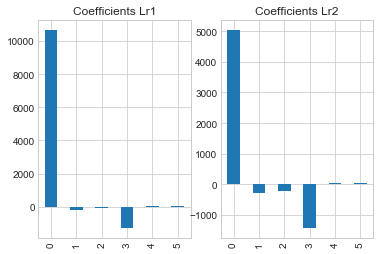

In [21]:
fig, ax = plt.subplots(1,2)

pd.Series(lr.coef_).plot(kind="bar", title="Coefficients Lr1", ax=ax[0])
pd.Series(lr2.coef_).plot(kind="bar", title="Coefficients Lr2", ax=ax[1]);

#### Robust Scaler

Scale features using statistics that are robust to outliers.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method.

Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, the median and the interquartile range often give better results.

[Robust Scaler Docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

In [22]:
# Instantiate Scaler Object
scaler2 = RobustScaler()

# Apply to X data
X_train_robust = scaler2.fit_transform(X_train)
X_test_robust = scaler2.transform(X_test)

# Look at the transformed data
X_train_robust[:5]

array([[ 0.70769231, -0.66666667,  2.66666667,  0.59016393,  0.57458564,
         0.51327434],
       [ 1.24615385, -0.33333333, -0.66666667,  0.93442623,  0.91160221,
         0.88495575],
       [ 0.47692308,  1.46666667,  0.66666667,  0.34972678,  0.33149171,
         0.46017699],
       [-0.6       ,  0.06666667, -0.66666667, -0.71584699, -0.74585635,
        -0.72566372],
       [-0.58461538, -0.53333333,  0.        , -0.67759563, -0.71270718,
        -0.72566372]])

In [23]:
# Train the model
lr3 = LinearRegression()
lr3.fit(X_train_robust, y_train)
lr3.score(X_test_robust, y_test)

0.8589396072085457

In [24]:
res3 = calc_cost(y_test, lr3.predict(X_test_robust))

MSE: 2242411.8780502984
MAE: 889.4218078106052
RMSE: 1497.4684898355285


In [25]:
lr2.coef_

array([ 5040.38858449,  -287.41409738,  -235.66476004, -1426.23152   ,
          44.37841515,    38.60130958])

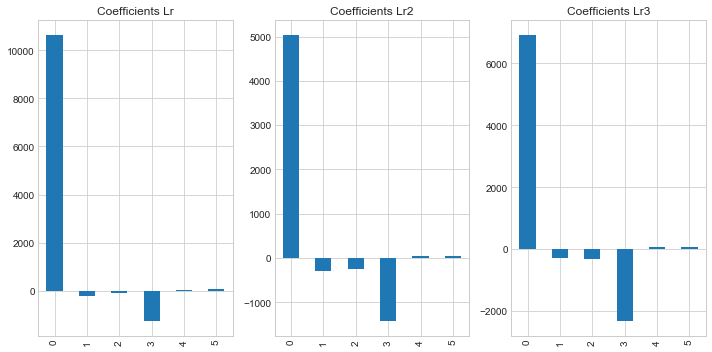

In [26]:
fig, ax = plt.subplots(1,3)

pd.Series(lr.coef_).plot(kind="bar", title="Coefficients Lr", ax=ax[0])
pd.Series(lr2.coef_).plot(kind="bar", title="Coefficients Lr2", ax=ax[1])
pd.Series(lr3.coef_).plot(kind="bar", title="Coefficients Lr3", ax=ax[2], figsize=(10,5))
plt.tight_layout();

#### Min Max Scaler

Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by:

```python
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
```

where min, max = feature_range.

This transformation is often used as an alternative to zero mean, unit variance scaling.

[Min Max Scaler Docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [27]:
# Instantiate Scaler Object
scaler3 = MinMaxScaler()

# Apply to X data
X_train_mm = scaler3.fit_transform(X_train)
X_test_mm = scaler3.transform(X_test)

# Look at the transformed data
X_train_mm[:5]

array([[0.1995842 , 0.49444444, 0.34782609, 0.63128492, 0.11460102,
        0.12924528],
       [0.27234927, 0.50833333, 0.13043478, 0.68994413, 0.12495756,
        0.14245283],
       [0.16839917, 0.58333333, 0.2173913 , 0.59031657, 0.10713073,
        0.12735849],
       [0.02286902, 0.525     , 0.13043478, 0.40875233, 0.07402377,
        0.08522013],
       [0.02494802, 0.5       , 0.17391304, 0.41527002, 0.07504244,
        0.08522013]])

In [28]:
# Train the model
lr4 = LinearRegression()
lr4.fit(X_train_mm, y_train)
lr4.score(X_test_mm, y_test)

0.8589396072085457

In [29]:
res4 = calc_cost(y_test, lr4.predict(X_test_mm))

MSE: 2242411.878050298
MAE: 889.4218078106037
RMSE: 1497.4684898355283


In [30]:
lr4.coef_

array([ 51220.12567193,  -7216.11507285,  -4858.02476812, -13672.60481307,
         2259.50094986,   1724.31853409])

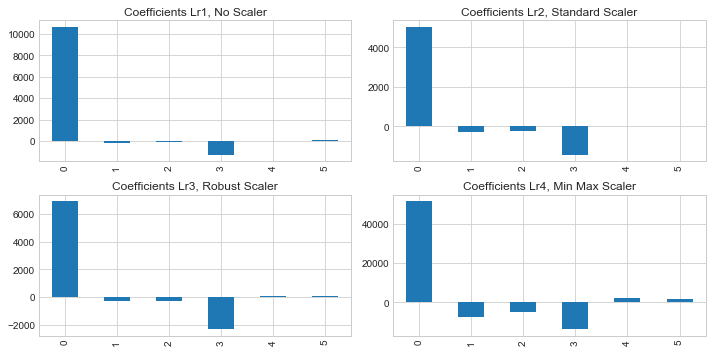

In [31]:
fig, ax = plt.subplots(2,2)

pd.Series(lr.coef_).plot(kind="bar", title="Coefficients Lr1, No Scaler", ax=ax[0,0])
pd.Series(lr2.coef_).plot(kind="bar", title="Coefficients Lr2, Standard Scaler", ax=ax[0,1])
pd.Series(lr3.coef_).plot(kind="bar", title="Coefficients Lr3, Robust Scaler", ax=ax[1,0])
pd.Series(lr4.coef_).plot(kind="bar", title="Coefficients Lr4, Min Max Scaler", ax=ax[1,1], figsize=(10,5))

plt.tight_layout();

## Feature Engineering

![](https://storage.googleapis.com/lds-media/images/feature-engineering-workflow.width-1200.jpg)

We can create new features from old features in our dataset to help the model lower the cost function. Feature engineering consists of representing categorical features numerically and creating a feature based on one or more features. 

Scikit-learn offers various ways of generating features from your data. We will explore two very common methods for encoding categorical columns. By representing our categorical data numerically we will be able to pass in these features into our mode. 

Creating effective features will help your model reduce error, but we do not want to many features since each additional feature increases the amount of mathematical operations performed on our dataset. One goal of a useful model is to achieve the best score with the fewest amount of features.

#### One Hot Encoding

![](https://i.imgur.com/mtimFxh.png)

You can convert categorical features to features that can be used with scikit-learn estimators with one-hot or dummy encoding. This type of encoding can be obtained with the OneHotEncoder, which transforms each categorical feature with n_categories possible values into n_categories binary features, with one of them 1, and all others 0.

```python
>>> enc = preprocessing.OneHotEncoder()
>>> X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
>>> enc.fit(X)
OneHotEncoder()
>>> enc.transform([['female', 'from US', 'uses Safari'],
...                ['male', 'from Europe', 'uses Safari']]).toarray()
array([[1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1.]])
```

By default, the values each feature can take is inferred automatically from the dataset and can be found in the categories_ attribute:

```python
>>> enc.categories_
[array(['female', 'male'], dtype=object), array(['from Europe', 'from US'], dtype=object), array(['uses Firefox', 'uses Safari'], dtype=object)]

```

[One-Hot Encoder Docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [32]:
train.describe(exclude="number")

,cut,color,clarity
count,34521,34521,34521
unique,5,7,8
top,Ideal,G,SI1
freq,13900,7188,8450


In [33]:
# Create our One Hot Encoder object
one_hot = OneHotEncoder()

col_names = ["color", "clarity"]

# One Hot encode the column
one_hot_df = one_hot.fit_transform(train[col_names]).toarray()
one_hot_df_test = one_hot.transform(test[col_names]).toarray()

In [34]:
# Look at the categories
one_hot.categories_

[array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
 array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
       dtype=object)]

In [35]:
# Create column names list for one hot encoded features
column_names = []

for y in range(len(one_hot.categories_)):
    for z in range(len(one_hot.categories_[y])):
        # print(one_hot.categories_[y][z])
        column_names.append(col_names[y]+"_"+one_hot.categories_[y][z])


column_names

['color_D',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J',
 'clarity_I1',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2']

In [36]:
def col_names(one_hot_model):
    
    "Create columns names list for one hot encoded feature"
    
    column_names = []
    
    col_names = ["color", "clarity"]

    for y in range(len(one_hot_model.categories_)):
        for z in range(len(one_hot_model.categories_[y])):
            # print(one_hot.categories_[y][z])
            column_names.append(col_names[y]+"_"+one_hot_model.categories_[y][z])
            
    return column_names

column_names = col_names(one_hot)

In [37]:
# Values for each row
one_hot_df

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [38]:
# Cast One Hot Encoded values into a dataframe

oh_df = pd.DataFrame(
    one_hot_df,
    index=train.index,
    columns = column_names
)

oh_df_test = pd.DataFrame(
    one_hot_df_test,
    index=test.index,
    columns = column_names
)

print(oh_df.shape)
print(oh_df_test.shape)

(34521, 15)
(10788, 15)


In [39]:
# Create train_new df by merging train and one hot encoded df together and drop color and clarity cols
train_new = train.merge(oh_df, on=train.index).set_index("key_0").drop(["color", "clarity"], axis=1)
test_new = test.merge(oh_df_test, on=test.index).set_index("key_0").drop(["color", "clarity"], axis=1)

print(train_new.shape)
print(test_new.shape)

(34521, 23)
(10788, 23)


#### Ordinal Encoder 

![](https://miro.medium.com/max/2736/0*T5jaa2othYfXZX9W.)

Some features are not given as continuous values but categorical. For example a person could have features `["male", "female"]`, `["from Europe", "from US", "from Asia"]`, `["uses Firefox", "uses Chrome", "uses Safari", "uses Internet Explorer"]`. Such features can be efficiently coded as integers, for instance `["male", "from US", "uses Internet Explorer"]` could be expressed as `[0, 1, 3] while ["female", "from Asia", "uses Chrome"] would be [1, 2, 1]`.

To convert categorical features to such integer codes, we can use the OrdinalEncoder. This estimator transforms each categorical feature to one new feature of integers (0 to n_categories - 1):

```python
>>> enc = preprocessing.OrdinalEncoder()
>>> X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
>>> enc.fit(X)
OrdinalEncoder()
>>> enc.transform([['female', 'from US', 'uses Safari']])
array([[0., 1., 1.]])
```

[Ordinal Encoder Docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)

In [40]:
ordinal = OrdinalEncoder()

col_names = ["cut"]

# Ordinal encode the column
ordinal_ls = ordinal.fit_transform(train[col_names])
ordinal_ls_test = ordinal.transform(test[col_names])

In [41]:
# Look at categories
ordinal.categories_

[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)]

In [42]:
# Add oridnally encoded column to the data
train_new["cut"] = ordinal_ls
test_new["cut"] = ordinal_ls_test

train_new.sample(5)

,carat,cut,depth,table,price,x,y,z,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
key_0,,,,,,,,,,,,,,,,,,,,,
25133,1.77,4.0,60.2,58.0,13691,7.88,7.83,4.73,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6094,0.81,2.0,61.5,57.0,3975,6.00,6.06,3.71,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6898,0.73,2.0,60.7,57.0,4134,5.84,5.88,3.55,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
43230,0.40,2.0,62.4,57.0,1397,4.72,4.67,2.93,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13647,1.22,2.0,60.6,56.0,5586,6.96,6.95,4.22,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### Model Using One Hot and Ordinally Encoded Features

In [43]:
target = "price"

X_train = train_new.drop(target, axis=1)
y_train = train_new[target]

X_test = test_new.drop(target, axis=1)
y_test = test_new[target]

In [44]:
lr5 = LinearRegression()

lr5.fit(X_train, y_train)
lr5.score(X_test, y_test)

0.9182653737780205

In [45]:
res4 = calc_cost(y_test, lr5.predict(X_test))

MSE: 1299320.7594362497
MAE: 743.569896575557
RMSE: 1139.877519488936


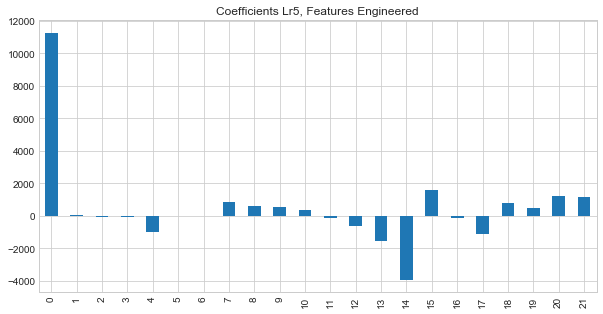

In [46]:
pd.Series(lr5.coef_).plot(kind="bar", title="Coefficients Lr5, Features Engineered",figsize=(10,5))

## Combining Feature Scaling and Feature Engineering

In [47]:
# Make a model with scaled and engineered features

# Change column order to make addition of scaled features easier
col_order_ls = ['carat','depth', 'table', 'x', 'y', 'z', 'cut', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']

# Re order columns
X_train = X_train[col_order_ls]
X_test = X_test[col_order_ls]

# Replace column values with values from scaled data
X_train[['carat','depth', 'table', 'x', 'y', 'z']] = X_train_scaled
X_test[['carat','depth', 'table', 'x', 'y', 'z']] = X_test_scaled

print(X_train.shape)
X_train.head()

(34521, 22)


,carat,depth,table,x,y,z,cut,color_D,color_E,color_F,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
key_0,,,,,,,,,,,,,,,,,,,,,
6881,0.760655,-0.659368,3.380087,0.930953,0.872289,0.797898,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15412,1.500090,-0.310659,-1.101247,1.493291,1.399586,1.387879,3.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3782,0.443755,1.572368,0.691287,0.538209,0.491944,0.713615,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34635,-1.035114,0.107792,-1.101247,-1.202362,-1.193677,-1.168703,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
37155,-1.013987,-0.519884,-0.204980,-1.139880,-1.141812,-1.168703,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [48]:
# Verify that index values match in both datasets
# We expect to see the same number of rows in X_train as the sum value
X_train.shape[0] == sum(X_train.index == y_train.index)

True

In [49]:
# Model
lr6 = LinearRegression()

lr6.fit(X_train, y_train)
lr6.score(X_test, y_test)

0.9182653737780205

In [50]:
res5 = calc_cost(y_test, lr6.predict(X_test))

MSE: 1299320.7594362495
MAE: 743.569896575557
RMSE: 1139.8775194889358


## Percent Decrease in the Cost Function

In [51]:
delta_mse = ((res1['MSE']- res5['MSE'])/res1['MSE'])*100
delta_mae = ((res1['MAE']- res5['MAE'])/res1['MAE'])*100
delta_rmse = ((res1['RMSE']- res5['RMSE'])/res1['RMSE'])*100

delta_ls = [round(delta_mse), round(delta_mae), round(delta_rmse)]
delta_ls2 = ["MSE % decrease", "MAE % decrease", "RMSE % decrease"]
    
for x in range(len(delta_ls)):
    print(f"{delta_ls2[x]}: {delta_ls[x]}")
        
    

MSE % decrease: 43
MAE % decrease: 17
RMSE % decrease: 24


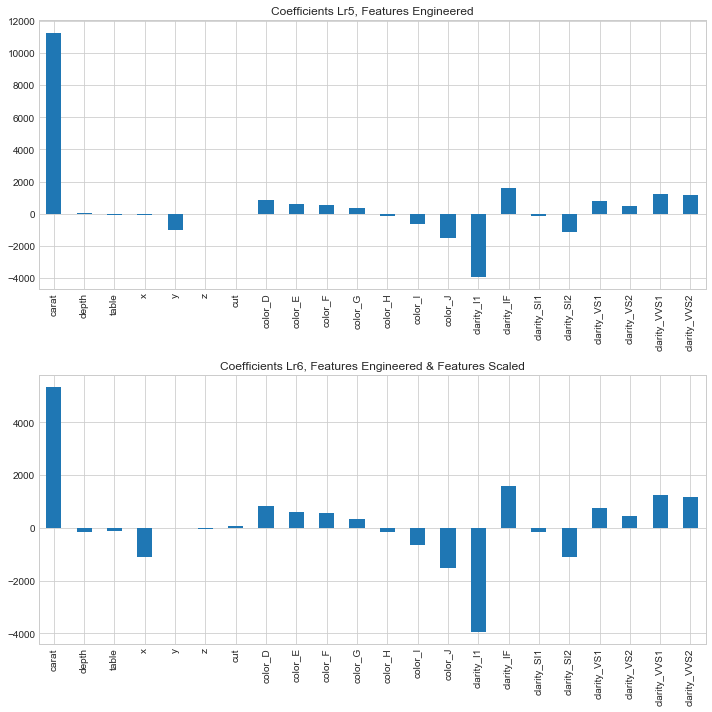

In [52]:
# plot results between scaled and unscaled

fig, ax = plt.subplots(2,1)

pd.Series(lr5.coef_).plot(
    kind="bar",
    title="Coefficients Lr5, Features Engineered",
    ax=ax[0]
)


pd.Series(lr6.coef_).plot(
    kind="bar", 
    title="Coefficients Lr6, Features Engineered & Features Scaled",
    ax=ax[1],
    figsize=(10,10)
)

ax[0].set_xticklabels(X_train.columns)
ax[1].set_xticklabels(X_train.columns)
plt.tight_layout()

# Fianal Results

In [54]:
# Save results to object and print results
print("Baseline")
b_preds = [y_train.mean() for x in range(len(y_train))]
res0 = calc_cost(y_train, b_preds)

print("\nLinear Regression MSE: 2273010.749657636, MAE: 897.1133312353487, RMSE: 1507.6507386187413")

print("\nUStandard Scaler")
res2 = calc_cost(y_test, lr2.predict(X_test_scaled))

print("\nRobust Scaler")
res3 = calc_cost(y_test, lr3.predict(X_test_robust))

print("\nMin Max Scaler")
res4 = calc_cost(y_test, lr4.predict(X_test_mm))

print("\nModel Using One Hot and Ordinally Encoded Features")
res4 = calc_cost(y_test, lr5.predict(X_test))

print("\nCombining Feature Scaling and Feature Engineering")
res5 = calc_cost(y_test, lr6.predict(X_test))

Baseline
MSE: 15959446.675367089
MAE: 3040.771604515672
RMSE: 3994.927618288858

Linear Regression MSE: 2273010.749657636, MAE: 897.1133312353487, RMSE: 1507.6507386187413

UStandard Scaler
MSE: 2242411.878050298
MAE: 889.4218078106034
RMSE: 1497.4684898355283

Robust Scaler
MSE: 2242411.8780502984
MAE: 889.4218078106052
RMSE: 1497.4684898355285

Min Max Scaler
MSE: 2242411.878050298
MAE: 889.4218078106037
RMSE: 1497.4684898355283

Model Using One Hot and Ordinally Encoded Features
MSE: 77491217.44895336
MAE: 6419.825669296717
RMSE: 8802.909601316678

Combining Feature Scaling and Feature Engineering
MSE: 1299320.7594362495
MAE: 743.569896575557
RMSE: 1139.8775194889358
